# Facial Recognition with Deep Learning in Keras Using CNN

#### Import Libraries

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from keras.utils import np_utils
import itertools

#### Load Dataset and normalize every image

In [2]:
#load dataset
data = np.load('ORL_faces.npz') 

# load the "Train Images"
x_train = data['trainX']
#normalize every image
x_train = np.array(x_train,dtype='float32')/255

x_test = data['testX']
x_test = np.array(x_test,dtype='float32')/255

# load the Label of Images
y_train= data['trainY']
y_test= data['testY']

# show the train and test Data format
print('x_train : {}'.format(x_train[:]))
print('Y-train shape: {}'.format(y_train))
print('x_test shape: {}'.format(x_test.shape))

x_train : [[0.1882353  0.19215687 0.1764706  ... 0.18431373 0.18039216 0.18039216]
 [0.23529412 0.23529412 0.24313726 ... 0.1254902  0.13333334 0.13333334]
 [0.15294118 0.17254902 0.20784314 ... 0.11372549 0.10196079 0.11372549]
 ...
 [0.44705883 0.45882353 0.44705883 ... 0.38431373 0.3764706  0.38431373]
 [0.4117647  0.4117647  0.41960785 ... 0.21176471 0.18431373 0.16078432]
 [0.45490196 0.44705883 0.45882353 ... 0.37254903 0.39215687 0.39607844]]
Y-train shape: [ 0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  1
  2  2  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  3  3
  4  4  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5
  6  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  7  7
  8  8  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9  9  9  9  9
 10 10 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 13 13
 14 14 14 14 14 14 1

####  Split the data set 

In [3]:
x_train, x_valid, y_train, y_valid= train_test_split(
    x_train, y_train, test_size=.05, random_state=1234,)

#### Transform the images to equal sizes to feed in CNN

In [4]:
im_rows=112
im_cols=92
batch_size=512
im_shape=(im_rows, im_cols, 1)

#change the size of images
x_train = x_train.reshape(x_train.shape[0], *im_shape)
x_test = x_test.reshape(x_test.shape[0], *im_shape)
x_valid = x_valid.reshape(x_valid.shape[0], *im_shape)

print('x_train shape: {}'.format(y_train.shape[0]))
print('x_test shape: {}'.format(y_test.shape))

x_train shape: 228
x_test shape: (160,)


#### Build a CNN model that has 3 main layers:

i. Convolutional Layer

ii. Pooling Layer

iii. Fully Connected Layer

In [5]:
#filters= the depth of output image or kernels

cnn_model= Sequential([
    Conv2D(filters=36, kernel_size=7, activation='relu', input_shape= im_shape),
    MaxPooling2D(pool_size=2),
    Conv2D(filters=54, kernel_size=5, activation='relu', input_shape= im_shape),
    MaxPooling2D(pool_size=2),
    Flatten(),
    Dense(2024, activation='relu'),
     Dropout(0.5),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dropout(0.5),
    #20 is the number of outputs
    Dense(20, activation='softmax')  
])

cnn_model.compile(
    loss='sparse_categorical_crossentropy',#'categorical_crossentropy',
    optimizer=Adam(lr=0.0001),
    metrics=['accuracy']
)

Show Model Parameters

In [6]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 106, 86, 36)       1800      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 53, 43, 36)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 49, 39, 54)        48654     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 19, 54)        0         
_________________________________________________________________
flatten (Flatten)            (None, 24624)             0         
_________________________________________________________________
dense (Dense)                (None, 2024)              49841000  
_________________________________________________________________
dropout (Dropout)            (None, 2024)              0

#### Train the model and Iterate the model until the accuracy is above 90%

In [7]:

history=cnn_model.fit(
    np.array(x_train), np.array(y_train), batch_size=512,
    epochs=250, verbose=2,
    validation_data=(np.array(x_valid),np.array(y_valid)),
)

Epoch 1/250
1/1 - 14s - loss: 2.9985 - accuracy: 0.0482 - val_loss: 2.9973 - val_accuracy: 0.0000e+00
Epoch 2/250
1/1 - 21s - loss: 2.9960 - accuracy: 0.0658 - val_loss: 3.0025 - val_accuracy: 0.0000e+00
Epoch 3/250
1/1 - 7s - loss: 3.0034 - accuracy: 0.0351 - val_loss: 3.0066 - val_accuracy: 0.0000e+00
Epoch 4/250
1/1 - 7s - loss: 2.9878 - accuracy: 0.0658 - val_loss: 3.0093 - val_accuracy: 0.0000e+00
Epoch 5/250
1/1 - 11s - loss: 2.9910 - accuracy: 0.0833 - val_loss: 3.0088 - val_accuracy: 0.0000e+00
Epoch 6/250
1/1 - 0s - loss: 2.9837 - accuracy: 0.0570 - val_loss: 3.0110 - val_accuracy: 0.0000e+00
Epoch 7/250
1/1 - 1s - loss: 2.9921 - accuracy: 0.0482 - val_loss: 3.0135 - val_accuracy: 0.0000e+00
Epoch 8/250
1/1 - 6s - loss: 2.9909 - accuracy: 0.0482 - val_loss: 3.0151 - val_accuracy: 0.0000e+00
Epoch 9/250
1/1 - 0s - loss: 2.9974 - accuracy: 0.0526 - val_loss: 3.0138 - val_accuracy: 0.0000e+00
Epoch 10/250
1/1 - 0s - loss: 2.9756 - accuracy: 0.0702 - val_loss: 3.0118 - val_accurac

Epoch 84/250
1/1 - 0s - loss: 0.4405 - accuracy: 0.9079 - val_loss: 0.1985 - val_accuracy: 1.0000
Epoch 85/250
1/1 - 0s - loss: 0.4298 - accuracy: 0.8816 - val_loss: 0.1746 - val_accuracy: 1.0000
Epoch 86/250
1/1 - 0s - loss: 0.4894 - accuracy: 0.8465 - val_loss: 0.1636 - val_accuracy: 1.0000
Epoch 87/250
1/1 - 0s - loss: 0.4052 - accuracy: 0.9035 - val_loss: 0.1597 - val_accuracy: 1.0000
Epoch 88/250
1/1 - 0s - loss: 0.3925 - accuracy: 0.8904 - val_loss: 0.1453 - val_accuracy: 1.0000
Epoch 89/250
1/1 - 0s - loss: 0.4219 - accuracy: 0.8947 - val_loss: 0.1151 - val_accuracy: 1.0000
Epoch 90/250
1/1 - 0s - loss: 0.4058 - accuracy: 0.9035 - val_loss: 0.1136 - val_accuracy: 1.0000
Epoch 91/250
1/1 - 0s - loss: 0.3984 - accuracy: 0.8816 - val_loss: 0.1115 - val_accuracy: 1.0000
Epoch 92/250
1/1 - 0s - loss: 0.3713 - accuracy: 0.8991 - val_loss: 0.0912 - val_accuracy: 1.0000
Epoch 93/250
1/1 - 0s - loss: 0.2755 - accuracy: 0.9211 - val_loss: 0.0792 - val_accuracy: 1.0000
Epoch 94/250
1/1 - 0

Epoch 167/250
1/1 - 0s - loss: 0.0356 - accuracy: 0.9956 - val_loss: 0.0039 - val_accuracy: 1.0000
Epoch 168/250
1/1 - 0s - loss: 0.0382 - accuracy: 0.9956 - val_loss: 0.0032 - val_accuracy: 1.0000
Epoch 169/250
1/1 - 0s - loss: 0.0473 - accuracy: 0.9912 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 170/250
1/1 - 0s - loss: 0.0247 - accuracy: 1.0000 - val_loss: 0.0026 - val_accuracy: 1.0000
Epoch 171/250
1/1 - 0s - loss: 0.0243 - accuracy: 0.9956 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 172/250
1/1 - 0s - loss: 0.0295 - accuracy: 1.0000 - val_loss: 0.0040 - val_accuracy: 1.0000
Epoch 173/250
1/1 - 0s - loss: 0.0252 - accuracy: 1.0000 - val_loss: 0.0061 - val_accuracy: 1.0000
Epoch 174/250
1/1 - 0s - loss: 0.0313 - accuracy: 0.9912 - val_loss: 0.0072 - val_accuracy: 1.0000
Epoch 175/250
1/1 - 0s - loss: 0.0450 - accuracy: 0.9912 - val_loss: 0.0049 - val_accuracy: 1.0000
Epoch 176/250
1/1 - 0s - loss: 0.0310 - accuracy: 0.9912 - val_loss: 0.0025 - val_accuracy: 1.0000
Epoch 177/

Epoch 248/250
1/1 - 0s - loss: 0.0152 - accuracy: 0.9956 - val_loss: 7.5449e-04 - val_accuracy: 1.0000
Epoch 249/250
1/1 - 0s - loss: 0.0179 - accuracy: 0.9912 - val_loss: 4.0390e-04 - val_accuracy: 1.0000
Epoch 250/250
1/1 - 0s - loss: 0.0129 - accuracy: 1.0000 - val_loss: 2.5613e-04 - val_accuracy: 1.0000


####  Evaluate the test data

In [8]:
scor = cnn_model.evaluate( np.array(x_test),  np.array(y_test), verbose=0)

print('test los {:.4f}'.format(scor[0]))
print('test acc {:.4f}'.format(scor[1]))

test los 0.3013
test acc 0.9438


#### Plot the result

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


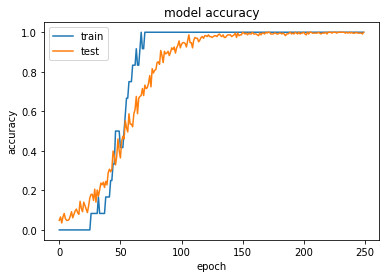

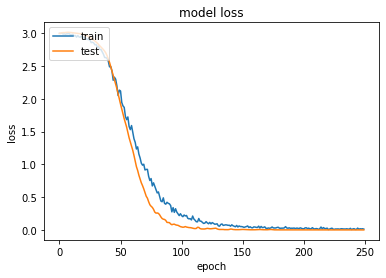

In [10]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### Plot the confusion matrix

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
accuracy : 
0.94375
Confusion matrix, without normalization
[[8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 6 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 0 6 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0]
 [0 

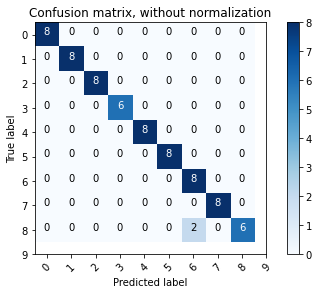

Confusion matrix, without normalization


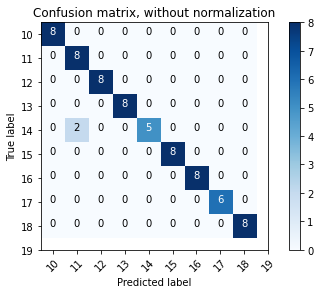

Confusion matrix:
[[8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 6 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 0 6 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 2 0 0 5 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0]
 [0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 6 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1

In [11]:

predicted =np.array( cnn_model.predict(x_test))
#print(predicted)
#print(y_test)
ynew = cnn_model.predict_classes(x_test)


Acc=accuracy_score(y_test, ynew)
print("accuracy : ")
print(Acc)
#/tn, fp, fn, tp = confusion_matrix(np.array(y_test), ynew).ravel()
cnf_matrix=confusion_matrix(np.array(y_test), ynew)

y_test1 = np_utils.to_categorical(y_test, 20)



def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


print('Confusion matrix, without normalization')
print(cnf_matrix)

plt.figure()
plot_confusion_matrix(cnf_matrix[1:10,1:10], classes=[0,1,2,3,4,5,6,7,8,9],
                      title='Confusion matrix, without normalization')

plt.figure()
plot_confusion_matrix(cnf_matrix[11:20,11:20], classes=[10,11,12,13,14,15,16,17,18,19],
                      title='Confusion matrix, without normalization')

print("Confusion matrix:\n%s" % confusion_matrix(np.array(y_test), ynew))
print(classification_report(np.array(y_test), ynew))